# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [32]:
df = pd.read_csv('./cross.csv')
df1 = pd.read_csv('./demo01.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [63]:
y = df1.mau
X = df.drop('mau', axis=1)

In [34]:
clf_dt = DecisionTreeClassifier(random_state=100)

In [35]:
clf_dt = clf_dt.fit(X,y)

In [69]:
y.value_counts()

False    16260
True       390
Name: mau, dtype: int64

In [82]:
X

,posse_de_veiculo,possui_email
0,1,0
1,0,1
2,0,1
3,1,1
4,1,0
...,...,...
16645,0,0
16646,0,0
16647,1,0
16648,1,0


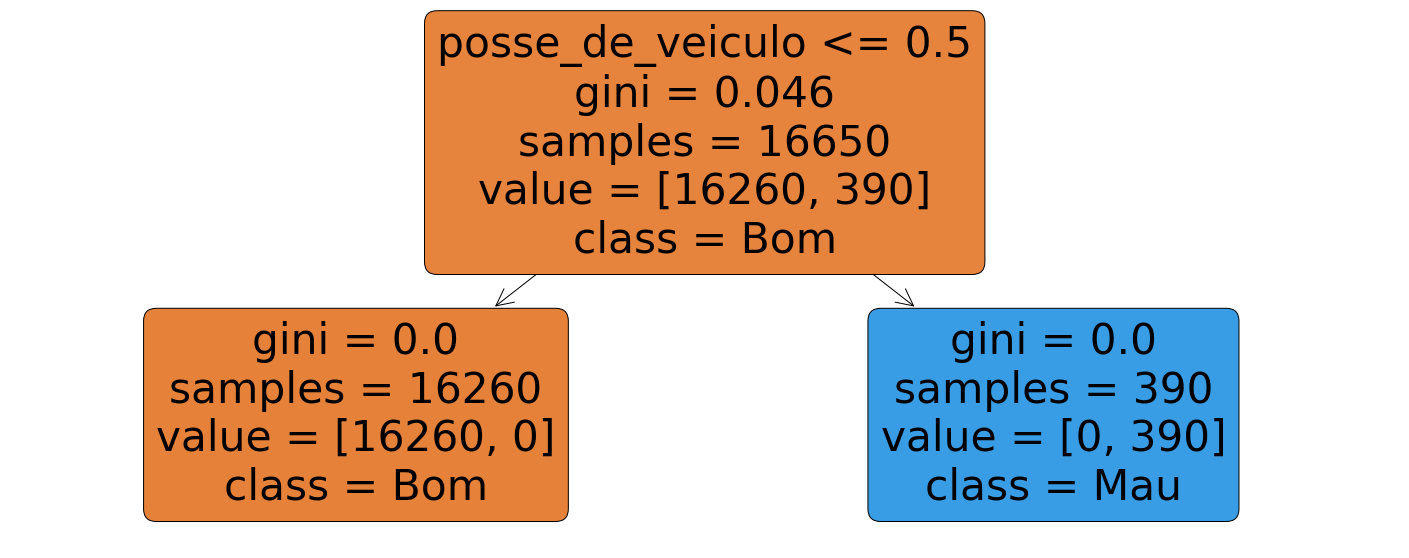

In [89]:
plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns);

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [72]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

In [76]:
clf = DecisionTreeClassifier(max_depth=2 ,random_state=100)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9745745745745745

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [90]:
clf_df = DecisionTreeClassifier(random_state=100)
clf_df

DecisionTreeClassifier(random_state=100)

In [96]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf_df.fit(X_train,y_train)

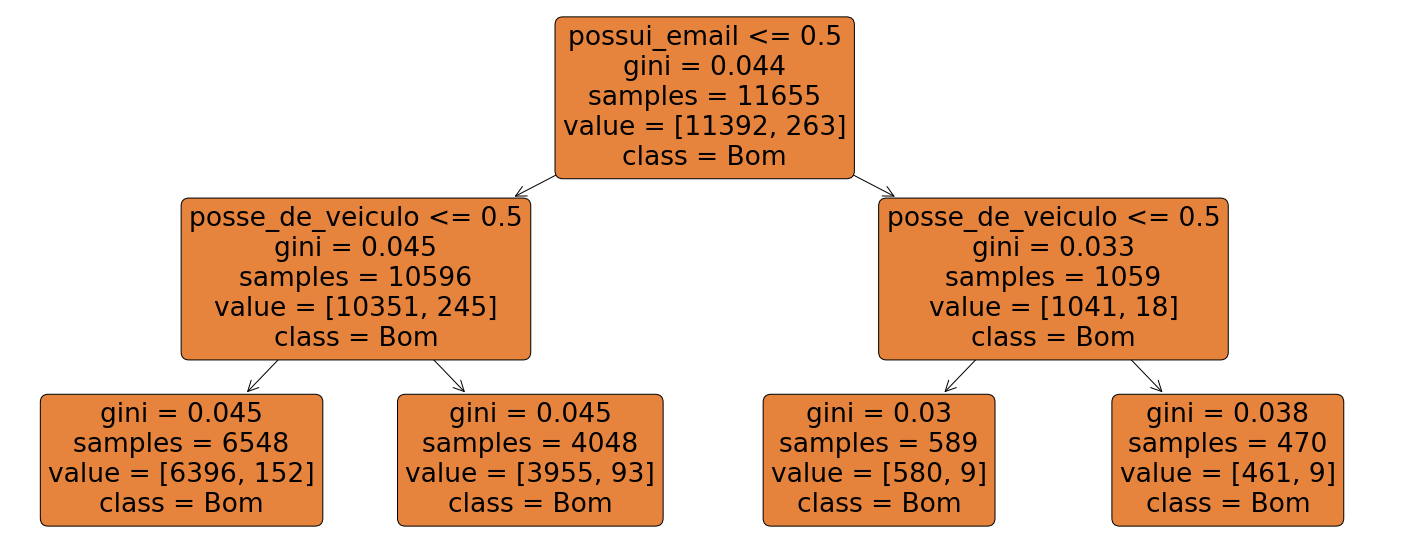

In [97]:
plt.figure(figsize=(25, 10))
plot_tree(clf_df,
          filled=True,
          rounded=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns);

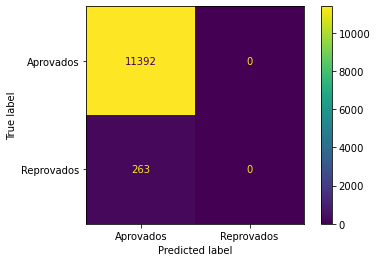

In [101]:
plot_confusion_matrix(clf, X_train,y_train, display_labels=['Aprovados', 'Reprovados']);

In [102]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9774345774345774

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [124]:
clf_teste = DecisionTreeClassifier(random_state=100)
clf_teste = clf_df.fit(X_test,y_test)

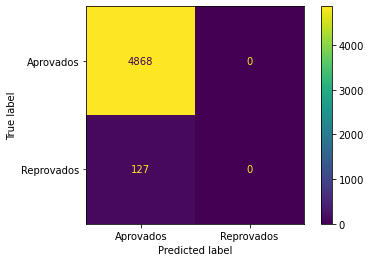

In [125]:
plot_confusion_matrix(clf_teste, X_test, y_test, display_labels=['Aprovados', 'Reprovados']);

In [126]:
predict1 = clf_teste.predict(X_test)
accuracy_score(y_test, predict1)

0.9745745745745745

In [121]:
clf1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=100)
clf1 = clf1.fit(X_train,y_train)
predict = clf1.predict(X_test)

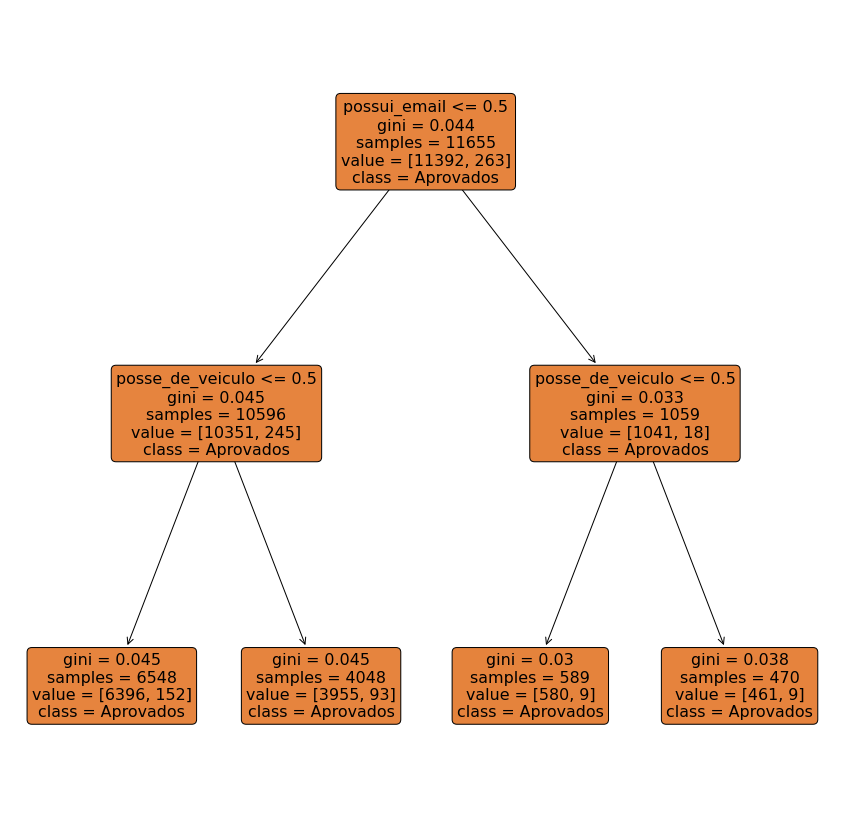

In [128]:
plt.figure(figsize=[15,15])
plot_tree(clf1,
         filled=True,
         rounded=True,
         class_names=['Aprovados', 'Reprovados'],
         feature_names=X_test.columns);

In [119]:
accuracy_score(y_test, predict)

0.9745745745745745